In [171]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import os
from model.classifier import Classifier
from model.norm_classifier import PowClassifier
from model.torch_rbf import *
import matplotlib.pyplot as plt
import numpy as np

In [172]:
log_dir = "./log/pos1_norm2_2022_12_24_00_30_20_648157/" 
file_dir = log_dir + "99/"

In [173]:
layer_widths = [28*28, 10]
layer_centres = [20]
basis_func = linear
model = RBFClassifier(layer_widths, layer_centres, basis_func)                                                 # 调用模型Model
model.load_state_dict(torch.load(file_dir+"model_parameter.pkl"))    # 加载模型参数     

<All keys matched successfully>

In [174]:
print(model.rbf_layers[0].centres.shape)

torch.Size([20, 784])


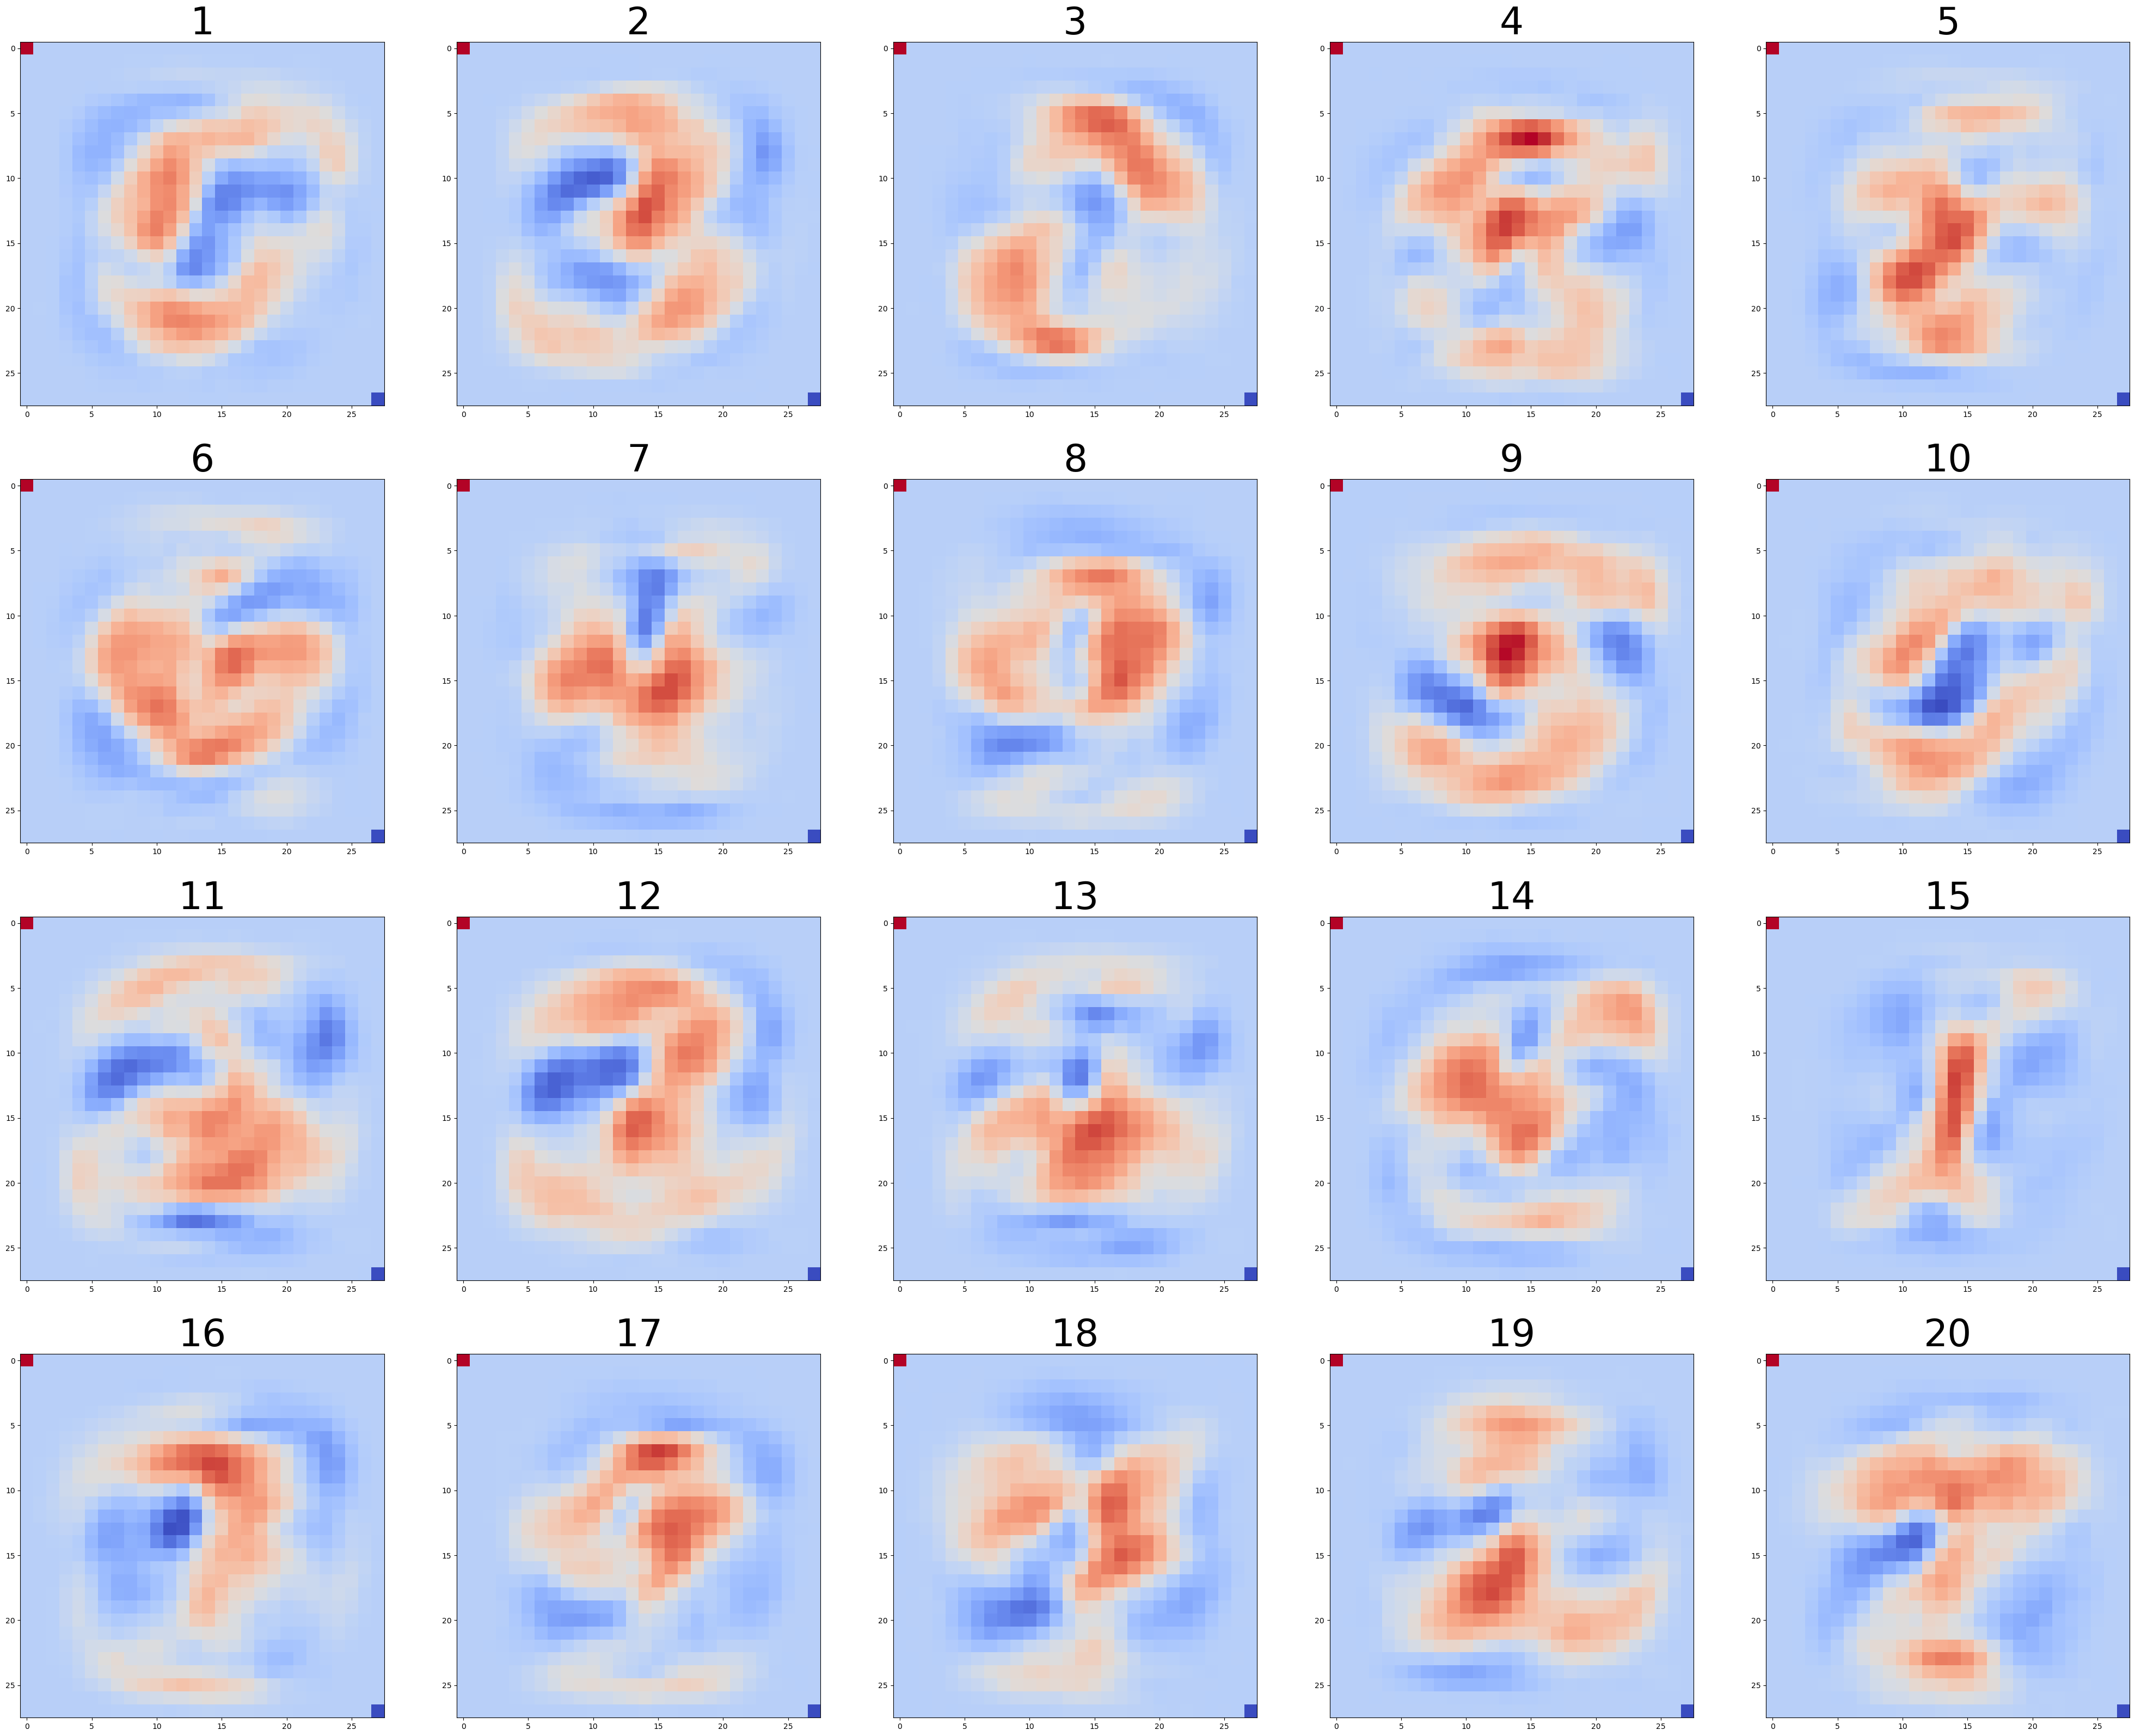

In [175]:
h = model.rbf_layers[0].centres.reshape(20, 28, 28).detach().numpy()
# b = model.b.detach().numpy()
fig, axes = plt.subplots(4, 5, figsize=(50, 40))

img = h

for i in range(4):
    for j in range(5):
        img[i*5+j, 0, 0] = np.max(img)
        img[i*5+j, 27, 27] = np.min(img)
        axes[i,j].imshow(np.tanh(img[i*5+j]/5), cmap='coolwarm')
        axes[i,j].set_title(str(i*5+j+1),{'fontsize':50})



[-11.304619    7.8491764 -15.8137455   9.490143    5.8280625   5.858616
   9.289364    1.1749442  11.037096  -14.30915    -9.982136   -8.459876
  -8.923668   10.259503   12.153318    4.2434855   5.1040854   7.3367214
   9.492376    3.298785 ]


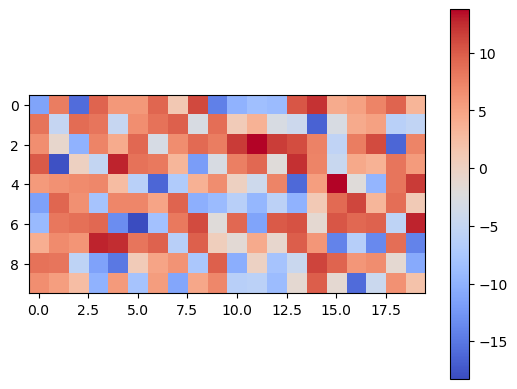

In [176]:
w = model.linear_layers[0].weight.detach().numpy()
# w[np.abs(w)<1e-2]=0
plt.imshow(w, cmap='coolwarm')
plt.colorbar()
print(w[0])

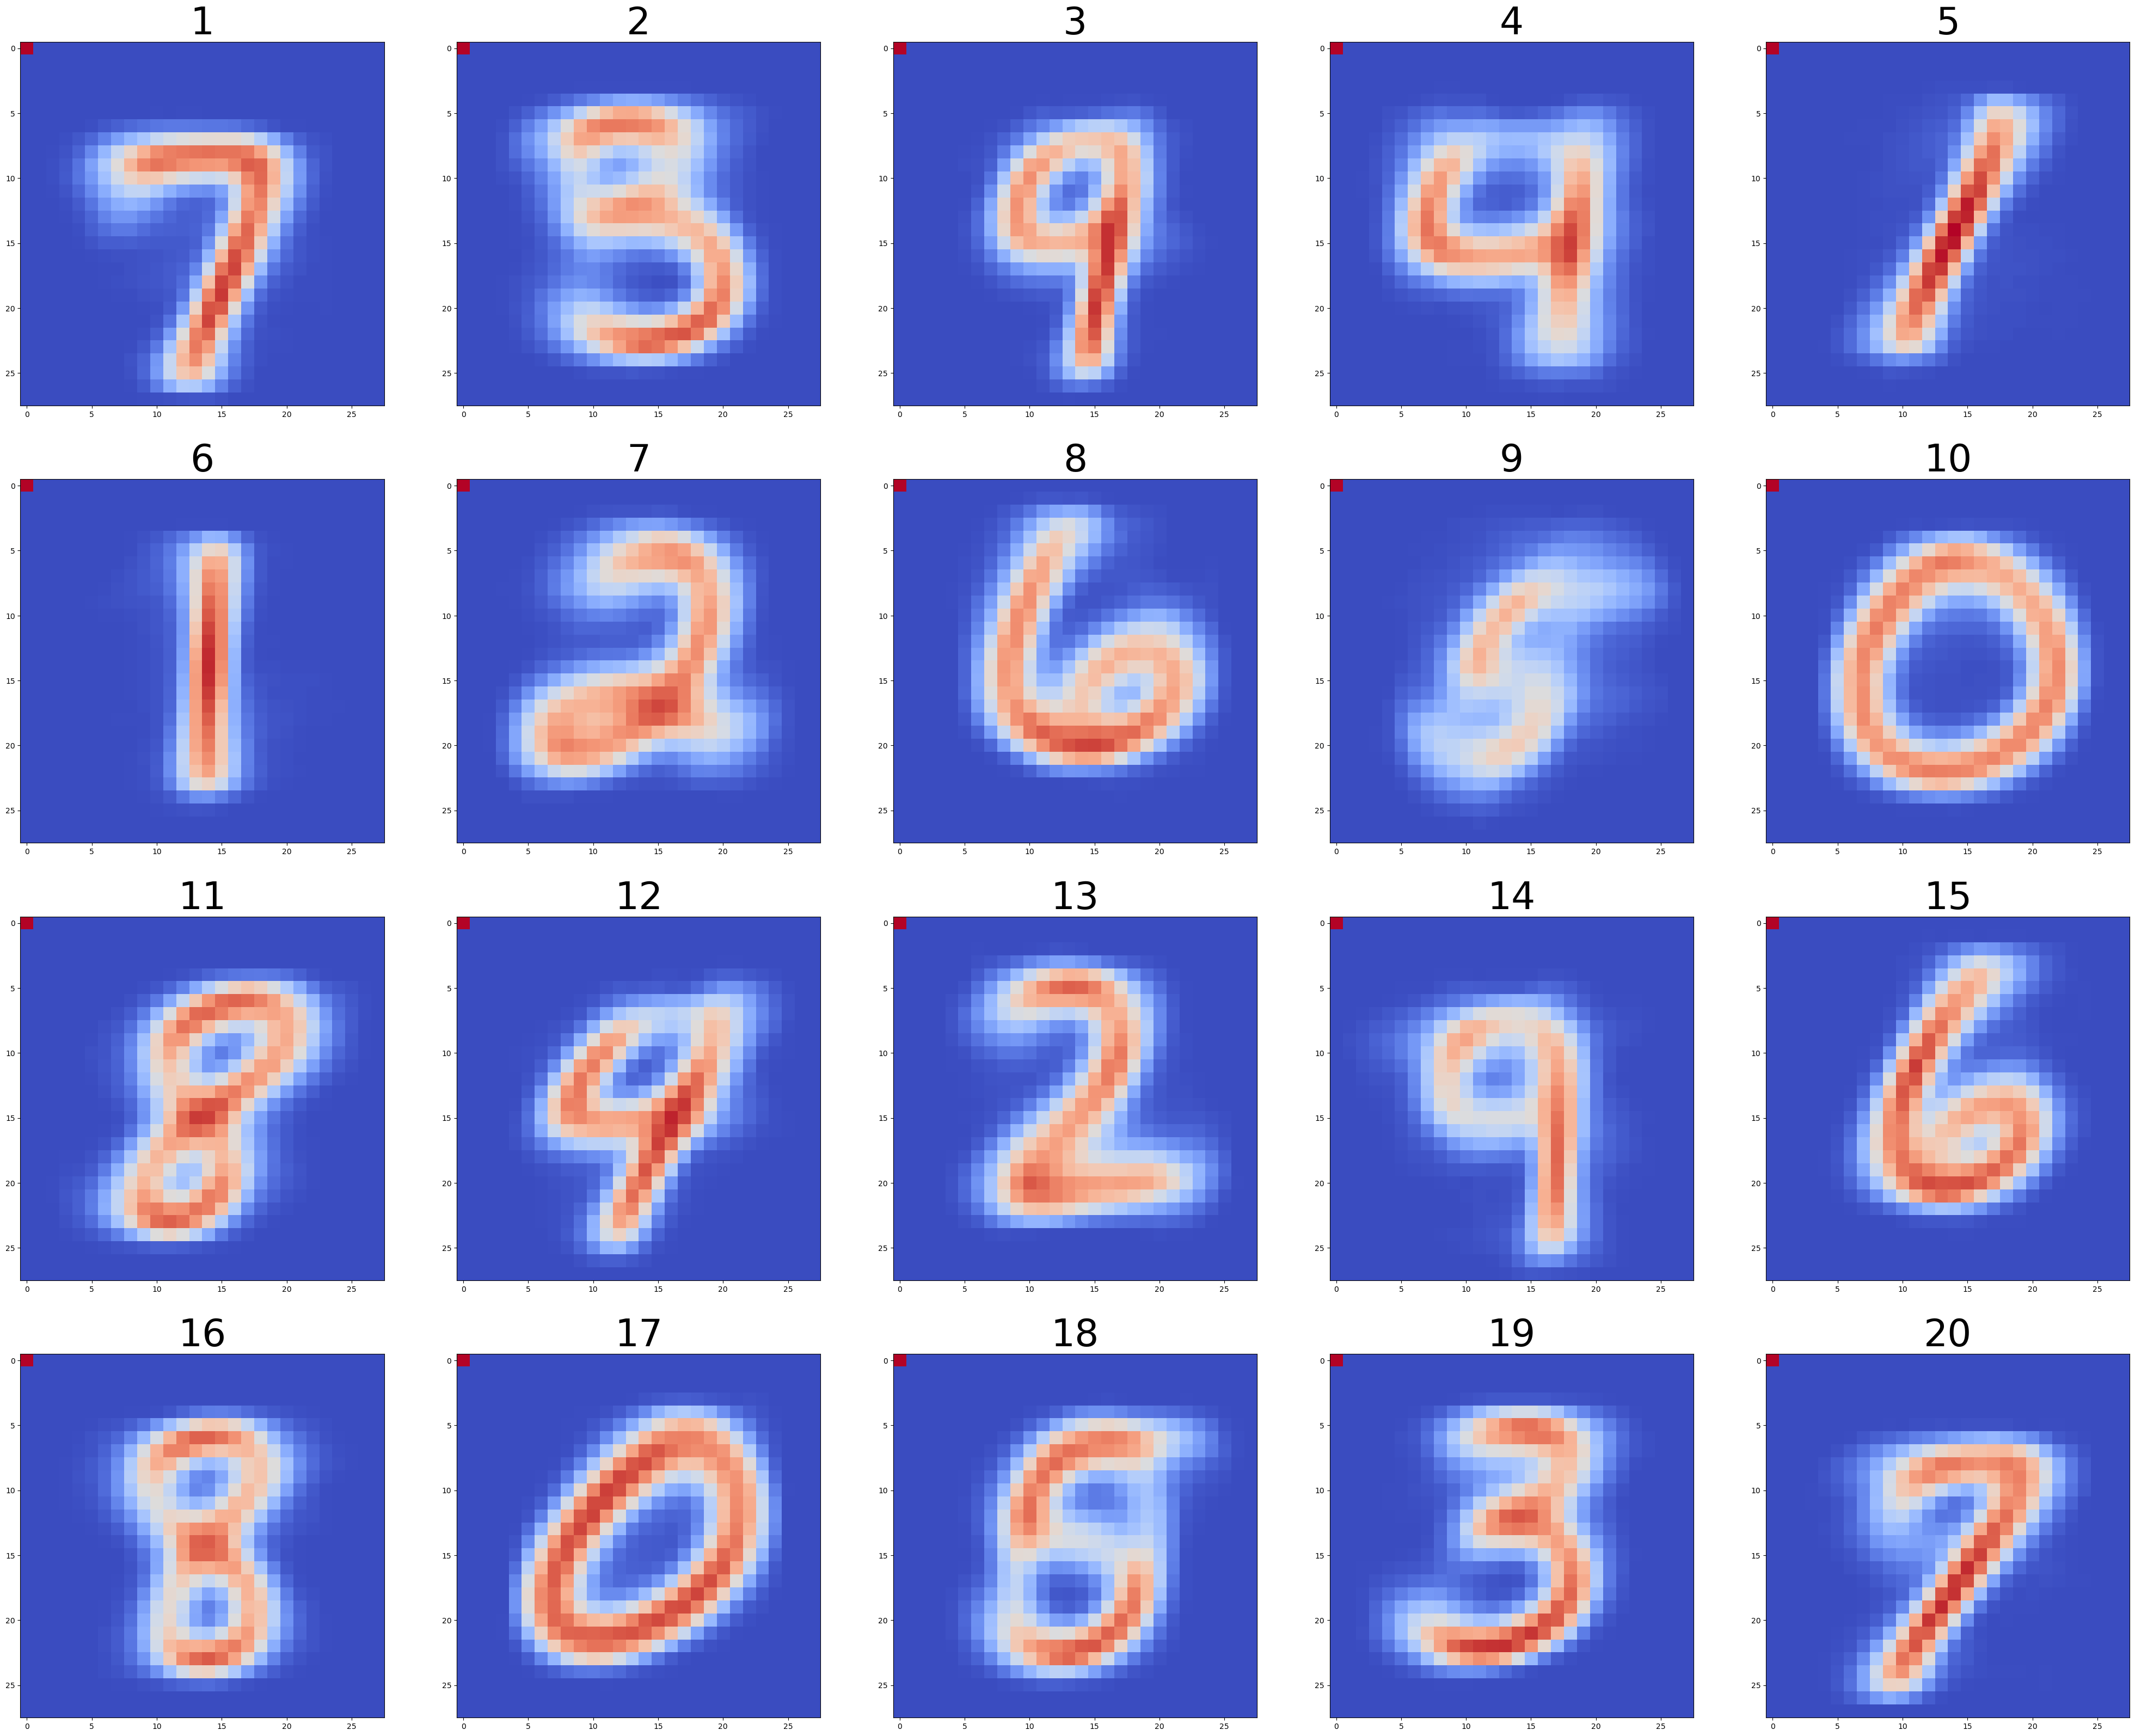

In [180]:
data = np.load("./data/EKmeans_20.npy")
data = data.reshape(20,28,28)
fig, axes = plt.subplots(4, 5, figsize=(50, 40))

img = data

for i in range(4):
    for j in range(5):
        img[i*5+j, 0, 0] = np.max(img)
        img[i*5+j, 27, 27] = np.min(img)
        cur_img = img[i*5+j] 
        cur_img = (cur_img - cur_img.mean())/(cur_img.var())
        axes[i,j].imshow(np.tanh(cur_img), cmap='coolwarm')
        axes[i,j].set_title(str(i*5+j+1),{'fontsize':50})
